# **Table Of Contents**



1. [**Import Libraries**](#class1)
2. [**Data Loading**](#class2)
3. [**Exploratory Data Analysis**](#class3)
4. [**Feature Engineering**](#class4)
    * [*Missing Value*](#class4a)
    * [*Split Train-Test*](#class4b)
    * [*Outlier Handling*](#class4c)
    * [*Feature Selection*](#class4d)
5. [**Pipelines**](#class5)
6. [**Model Definition**](#class6)
7. [**Model Training**](#class7)
8. [**Model Validation**](#class8)
9. [**Hyperparameter Tuning**](#class9)
10. [**Model Evaluation**](#class10)
11. [**Model Saving**](#class11)



---

## <a id="class2">**1. Import Libraries**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/4911/4911643.png" alt="drawing" width="64" align="center"/></a>

---

In [1]:
# Import Library

# Library Dataframe
import pandas as pd

# Library Numerical Data
import numpy as np

# Library Statistic
from scipy import stats
from sklearn import metrics
from scipy.stats import uniform, randint
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

# Library Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Library Outlier Handling
from feature_engine.outliers import Winsorizer

# Library Correlation
from scipy.stats import kendalltau, spearmanr

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library Machine Learning Model
import xgboost as xg 
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Model Evaluation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Save Model
import pickle
import joblib
import json

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")



---

## <a id="class3">**2. Data Loading**</a> <a style="float:right; margin-right: 15px"><img src="https://icons.veryicon.com/png/128/business/commercial-plain-blue-collection/wd-accent-data-clock.png" alt="drawing" width="64" align="center"/></a>

---

In [2]:
# Membaca data dari file CSV
df = pd.read_csv('laptop_updated.csv', encoding='latin1')

In [3]:
# Membuat salinan dari dataframe df_credit
living_index = df.copy()

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Menampilkan sepuluh baris pertama dari DataFrame
df.head(10)

,index_col,Company,TypeName,Inches,screen_size,resolution_width,resolution_height,ips_panel,touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price,ppi
0,1,HP,Ultrabook,12.5,small,3840,2160,1,1,Intel,Core M,1.2,8,SSD,512.0,0,Intel,windows,0.97,107306,352
1,2,Asus,Notebook,17.3,large,1920,1080,0,0,Intel,Core i7,1.8,8,Hybrid,128.0,1024,Nvidia,windows,2.10,61006,127
2,3,Apple,Ultrabook,13.3,small,2560,1600,1,0,Intel,Core i5,2.3,8,SSD,128.0,0,Intel,macos,1.37,71379,227
3,4,Asus,Notebook,17.3,large,1366,768,0,0,Intel,Pentium Quad,1.1,4,HDD,1024.0,0,Nvidia,windows,2.80,24828,91
4,5,Asus,Notebook,15.6,medium,1920,1080,0,0,Intel,Celeron Dual,1.1,4,HDD,1024.0,0,Intel,windows,2.00,18328,141
5,6,Acer,Notebook,15.6,medium,1366,768,0,0,Intel,Core i3,2.0,4,HDD,1024.0,0,Intel,windows,2.10,23816,100
6,7,Dell,Gaming,15.6,medium,1920,1080,0,0,Intel,Core i7,2.8,16,SSD,512.0,0,Nvidia,windows,2.56,66561,141
7,8,Apple,Ultrabook,13.3,small,1440,900,0,0,Intel,Core i5,1.8,8,Flash Storage,128.0,0,Intel,macos,1.34,47896,128
8,9,Dell,Gaming,15.6,medium,1920,1080,0,0,Intel,Core i7,2.8,8,Hybrid,1024.0,0,Nvidia,windows,2.62,47899,141
9,10,Asus,Notebook,17.3,large,1920,1080,0,0,Intel,Core i7,2.7,8,Hybrid,128.0,1024,Nvidia,NaN,2.69,47366,127


In [6]:
# Menampilkan sepuluh baris terakhir dari DataFrame
df.tail(10)

,index_col,Company,TypeName,Inches,screen_size,resolution_width,resolution_height,ips_panel,touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price,ppi
1262,1263,Lenovo,Notebook,15.6,medium,1920,1080,0,0,Intel,Core i7,2.5,4,Hybrid,1024.0,0,Intel,windows,2.32,43956,141
1263,1264,HP,Netbook,11.6,small,1366,768,0,0,Intel,Celeron Dual,1.6,2,Flash Storage,32.0,0,Intel,windows,1.17,11136,135
1264,1265,Lenovo,Gaming,15.6,medium,1920,1080,1,0,Intel,Core i7,2.6,16,SSD,512.0,0,Nvidia,windows,3.31,69530,141
1265,1266,Asus,Notebook,15.6,medium,1366,768,0,0,Intel,Core i7,2.5,4,HDD,500.0,0,Nvidia,windows,2.20,38379,100
1266,1267,MSI,Gaming,15.6,medium,1920,1080,0,0,Intel,Core i7,2.6,16,Hybrid,128.0,1024,Nvidia,windows,1.91,114732,141
1267,1268,Lenovo,2 in 1 Convertible,14.0,medium,1920,1080,1,1,Intel,Core i7,2.5,4,SSD,128.0,0,Intel,windows,1.80,33993,157
1268,1269,HP,Notebook,15.6,medium,1366,768,0,0,Intel,Core i3,2.3,4,HDD,500.0,0,Intel,windows,2.07,34632,100
1269,1270,Lenovo,2 in 1 Convertible,13.3,small,3200,1800,1,1,Intel,Core i7,2.5,16,SSD,512.0,0,Intel,windows,1.30,79867,276
1270,1271,Lenovo,Notebook,14.0,medium,1366,768,0,0,Intel,Celeron Dual,1.6,2,Flash Storage,64.0,0,Intel,windows,1.50,12201,112
1271,1272,HP,Notebook,15.6,medium,1366,768,0,0,Intel,Core i7,2.5,6,HDD,1024.0,0,AMD,windows,2.19,40706,100


In [7]:
# Menampilkan informasi umum tentang DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index_col          1272 non-null   int64  
 1   Company            1272 non-null   object 
 2   TypeName           1272 non-null   object 
 3   Inches             1272 non-null   float64
 4   screen_size        1272 non-null   object 
 5   resolution_width   1272 non-null   int64  
 6   resolution_height  1272 non-null   int64  
 7   ips_panel          1272 non-null   int64  
 8   touchscreen        1272 non-null   int64  
 9   cpu_brand          1272 non-null   object 
 10  cpu_name           1272 non-null   object 
 11  cpu_speed          1272 non-null   float64
 12  Ram                1272 non-null   int64  
 13  memory_type        1271 non-null   object 
 14  primary_storage    1271 non-null   float64
 15  secondary_storage  1272 non-null   int64  
 16  gpu_brand          1272 

In [8]:
# Menampilkan statistik deskriptif dari DataFrame
print(df.describe())

        index_col       Inches  resolution_width  resolution_height  \
count  1272.00000  1272.000000       1272.000000        1272.000000   
mean    636.50000    15.130818       1894.199686        1070.531447   
std     367.33908     1.954436        494.389426         284.512222   
min       1.00000    10.100000       1366.000000         768.000000   
25%     318.75000    14.000000       1600.000000         900.000000   
50%     636.50000    15.600000       1920.000000        1080.000000   
75%     954.25000    15.600000       1920.000000        1080.000000   
max    1272.00000    35.600000       3840.000000        2160.000000   

         ips_panel  touchscreen    cpu_speed          Ram  primary_storage  \
count  1272.000000  1272.000000  1272.000000  1272.000000      1271.000000   
mean      0.282233     0.145440     2.298192     8.463050       448.412274   
std       0.450263     0.352683     0.507680     5.566582       366.717613   
min       0.000000     0.000000     0.900000    

In [9]:
# Menampilkan jumlah baris duplikat dalam DataFrame
print(df.duplicated().sum())

0


In [10]:
print(df['price'])

0       107306
1        61006
2        71379
3        24828
4        18328
         ...  
1267     33993
1268     34632
1269     79867
1270     12201
1271     40706
Name: price, Length: 1272, dtype: int64


di dataset variabel price sebelum 2 angka terakhir tidak ada koma sehingga nilai price besar, maka perlu ditambahnya tanda koma sebelum 2 angka terakhir 

In [11]:
# menambahkan koma pada variabel price
df['price'] = df['price'] / 100

In [12]:
for column in df.columns:
    print('Number of unique value in the variable {:<25}: {}'.format(column, len(df[column].unique())))


Number of unique value in the variable index_col                : 1272
Number of unique value in the variable Company                  : 19
Number of unique value in the variable TypeName                 : 6
Number of unique value in the variable Inches                   : 24
Number of unique value in the variable screen_size              : 3
Number of unique value in the variable resolution_width         : 13
Number of unique value in the variable resolution_height        : 10
Number of unique value in the variable ips_panel                : 2
Number of unique value in the variable touchscreen              : 2
Number of unique value in the variable cpu_brand                : 3
Number of unique value in the variable cpu_name                 : 40
Number of unique value in the variable cpu_speed                : 24
Number of unique value in the variable Ram                      : 10
Number of unique value in the variable memory_type              : 5
Number of unique value in the variable

mengecek cardinality dengan melihat jumlah unique value di setiap variable

In [13]:
df["cpu_name"].unique()

array(['Core M', 'Core i7', 'Core i5', 'Pentium Quad', 'Celeron Dual',
       'Core i3', 'A6-Series 9220', 'A9-Series 9420', 'A6-Series A6-9220',
       'Ryzen 1700', 'E-Series E2-9000e', 'Xeon E3-1505M',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A10-Series 9600P',
       'FX 9830P', 'E-Series 9000e', 'A8-Series 7410', 'A12-Series 9720P',
       'A10-Series A10-9620P', 'Ryzen 1600', 'Celeron Quad',
       'E-Series 7110', 'Atom x5-Z8350', 'A10-Series 9620P',
       'E-Series 6110', 'A9-Series A9-9420', 'A6-Series 7310',
       'Atom Z8350', 'Xeon E3-1535M', 'Pentium Dual', 'A12-Series 9700P',
       'E-Series E2-9000', 'FX 8800P', 'Atom X5-Z8350', 'A4-Series 7210',
       'Cortex A72&A53', 'Atom x5-Z8550', 'E-Series 9000',
       'A9-Series 9410'], dtype=object)

setelah cek cardinality variabel cpu_name ternyata memiliki nilai ordinal maka dilakukan pemisahan pada variabel cpu_name dengan membuat kolom baru bernama cpu_performance yang berisi 3 kategori baru yaitu high end, medium end dan low end yang mewakilkan performance cpu

Low-end CPUs:
- Atom x5-Z8300, Atom x5-Z8350, Atom X5-Z8350, Atom x5-Z8550
- Celeron Dual, Celeron Quad
- E-Series E2-6110, E-Series E2-9000e, E-Series E2-9000, E-Series E2-9000e
- A4-Series 7210, A6-Series 7310, A6-Series A6-9220, A9-Series 9410, A9-Series A9-9420
- Pentium Dual, Pentium Quad

Medium-end CPUs:
- A6-Series 9220, A9-Series 9420, A10-Series 9600P, A10-Series A10-9620P, A10-Series 9620P
- A8-Series 7410, A12-Series 9720P, A12-Series 9700P
- E-Series 7110, E-Series 9000
- Ryzen 1600, Ryzen 1700

High-end CPUs:
- Core M, Core i3, Core i5, Core i7
- Xeon E3-1505M, Xeon E3-1535M
- FX 8800P, FX 9830P
- Cortex A72&A53

In [14]:
# Daftar CPU berdasarkan kategori
low_end_cpus = [
    'Atom x5-Z8300', 'Atom x5-Z8350', 'Atom X5-Z8350', 'Atom x5-Z8550',
    'Celeron Dual', 'Celeron Quad',
    'E-Series E2-6110', 'E-Series E2-9000e', 'E-Series E2-9000', 'E-Series E2-9000e',
    'A4-Series 7210', 'A6-Series 7310', 'A6-Series A6-9220', 'A9-Series 9410', 'A9-Series A9-9420',
    'Pentium Dual', 'Pentium Quad'
]

medium_end_cpus = [
    'A6-Series 9220', 'A9-Series 9420', 'A10-Series 9600P', 'A10-Series A10-9620P', 'A10-Series 9620P',
    'A8-Series 7410', 'A12-Series 9720P', 'A12-Series 9700P',
    'E-Series 7110', 'E-Series 9000',
    'Ryzen 1600', 'Ryzen 1700'
]

high_end_cpus = [
    'Core M', 'Core i3', 'Core i5', 'Core i7',
    'Xeon E3-1505M', 'Xeon E3-1535M',
    'FX 8800P', 'FX 9830P',
    'Cortex A72&A53'
]

# Inisialisasi list untuk menyimpan kategori kinerja CPU
perf_cat=[] 

# Iterasi melalui data 'cpu_name' pada dataframe df
for i in df['cpu_name'] : 
    # Memeriksa apakah CPU termasuk dalam kategori low_end_cpus
    if i in low_end_cpus:
        perf_cat.append('low end')
    # Memeriksa apakah CPU termasuk dalam kategori medium_end_cpus
    elif i in medium_end_cpus:
        perf_cat.append('medium end')
    # Jika tidak termasuk dalam kategori low atau medium, maka termasuk high_end_cpus
    else:
        perf_cat.append('high end') 

# Menambahkan kolom 'cpu_performance' ke dataframe df
df['cpu_performance']= perf_cat


setelah dibuat variabel baru cpu_performance maka variabel cpu_name tidak lagi dibutuhkan, maka perlunya untuk menghapus variabel cpu_name tetapi penghapusan dilakukan setelah EDA karena variabel cpu_name dapat di ambil insightnya

In [15]:
df['cpu_performance'].value_counts()

cpu_performance
high end      1087
low end        140
medium end      45
Name: count, dtype: int64

pada dataset terdapat variabel index_col yang berfungsi sebagai index sehingga indexing pada dataset menjadi double, maka perlunya untuk menghapus variabel index_col 

In [16]:
# Menghapus kolom index
df = df.drop(['index_col'], axis=1)
df.head()

,Company,TypeName,Inches,screen_size,resolution_width,resolution_height,ips_panel,touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price,ppi,cpu_performance
0,HP,Ultrabook,12.5,small,3840,2160,1,1,Intel,Core M,1.2,8,SSD,512.0,0,Intel,windows,0.97,1073.06,352,high end
1,Asus,Notebook,17.3,large,1920,1080,0,0,Intel,Core i7,1.8,8,Hybrid,128.0,1024,Nvidia,windows,2.10,610.06,127,high end
2,Apple,Ultrabook,13.3,small,2560,1600,1,0,Intel,Core i5,2.3,8,SSD,128.0,0,Intel,macos,1.37,713.79,227,high end
3,Asus,Notebook,17.3,large,1366,768,0,0,Intel,Pentium Quad,1.1,4,HDD,1024.0,0,Nvidia,windows,2.80,248.28,91,low end
4,Asus,Notebook,15.6,medium,1920,1080,0,0,Intel,Celeron Dual,1.1,4,HDD,1024.0,0,Intel,windows,2.00,183.28,141,low end



---

## <a id="class4">**3. Exploratory Data Analysis (EDA)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/272/272369.png" alt="drawing" width="64" align="center"/></a>

---

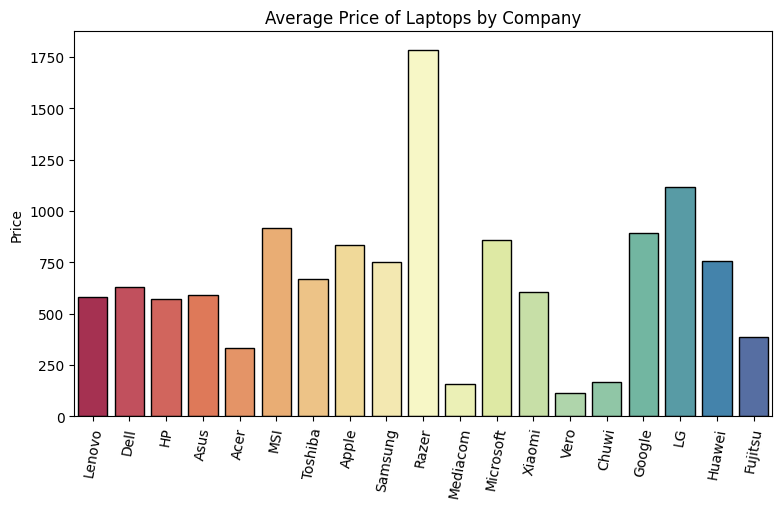

In [17]:
# Mendapatkan daftar 20 perusahaan dengan jumlah laptop terbanyak
company_list = df['Company'].value_counts().index[:20].tolist()

# Membuat figure dan axis untuk plot
plt.figure(figsize=(9,5))

# Membuat plot batang menggunakan seaborn untuk menghitung rata-rata harga laptop berdasarkan perusahaan
ax = sns.barplot(
    x='Company', 
    y='price', 
    data=df[df['Company'].isin(company_list)],  # Hanya menyertakan perusahaan yang ada dalam daftar company_list
    order=company_list,  # Mengurutkan perusahaan berdasarkan company_list
    palette='Spectral',  # Menggunakan palet warna 'Spectral'
    errorbar=('ci', False),  # Tidak menampilkan error bar
    edgecolor="black"  # Mengatur warna tepi batang menjadi hitam
)

plt.xticks(rotation=80)
plt.title('Average Price of Laptops by Company') 
plt.xlabel('') 
plt.ylabel('Price') 
plt.show()  


berdasarkan bar plot terlihat perusahaan razer memiliki nilai rata-rata harga laptop paling tinggi, dikarenakan Razer merupakan salah satu leading laptop gaming  diikuti LG, MSI, Google,Microsoft,Apple

***Insight***
- Pasar Target yang Spesifik: Razer, dengan harga laptop yang tinggi, menargetkan konsumen yang mengutamakan performa tinggi dan kualitas dalam perangkat gaming. Hal ini menunjukkan bahwa ada segmen pasar yang siap membayar lebih untuk fitur-fitur khusus seperti grafik yang kuat, layar berkualitas tinggi, dan kecepatan prosesor yang tinggi.

- Brand Image dan Reputasi: Razer telah berhasil membangun citra sebagai salah satu merek terkemuka di industri laptop gaming. Harga yang tinggi bisa menjadi cerminan dari reputasi mereka dalam menghasilkan produk dengan desain inovatif, performa handal, dan keandalan tinggi.

- novasi dan Teknologi: Mereka mungkin menggunakan teknologi terbaru dan inovasi dalam desain dan produksi laptop mereka, yang mempengaruhi harga akhir produk. Konsumen yang menghargai inovasi dan teknologi canggih cenderung lebih memilih produk dengan harga yang lebih tinggi.

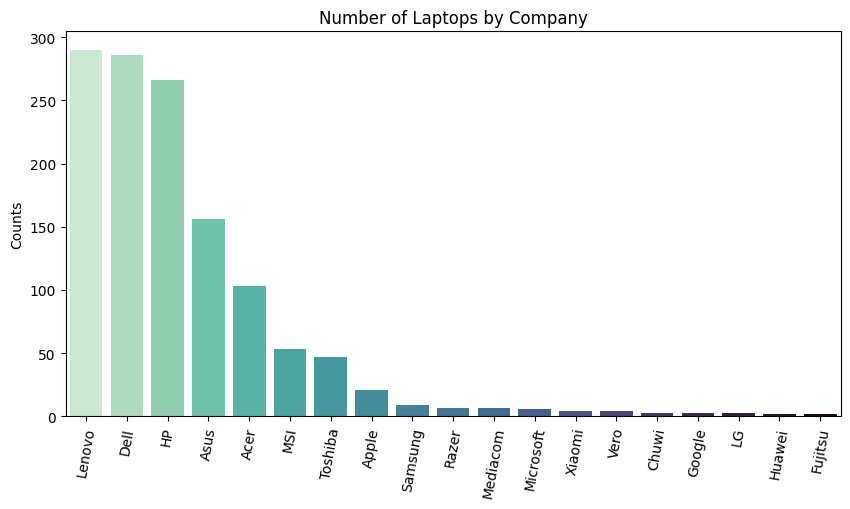

In [18]:
# Membuat plot
fig, ax = plt.subplots(figsize=(10,5))

# Membuat plot batang menggunakan seaborn untuk menghitung jumlah laptop berdasarkan perusahaan
ax = sns.countplot(x='Company', data=df, palette='mako_r', order=df['Company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

plt.title('Number of Laptops by Company')  
plt.ylabel('Counts') 
plt.xlabel('')  
plt.show() 


berdasarkan bar plot diketahui laptop paling banyak dijual adalah Lenovo, Dell dan HP dikarenakan brand ini memiliki jangkauan pasar yang besar bagi kalangan pekerja kantoran kemudian diikuti Asus , Acer dan MSI dikarenakan mereka menjual gaming laptop yang jangkauan pasarnya adalah gamer

***Insight*** 

- Diversifikasi Segmentasi Pasar: Lenovo, Dell, dan HP menjangkau pasar luas di kalangan masyarakat umum. Hal ini menunjukkan bahwa laptop-laptop mereka menawarkan kualitas, keandalan, dan dukungan yang dibutuhkan oleh segmen pasar ini, seperti performa yang handal untuk aplikasi pekerjaan dan daya tahan baterai yang baik.

- Spesialisasi dalam Gaming: Asus, Acer dan MSI fokus pada pasar gaming dengan laptop-laptop yang dirancang khusus untuk kebutuhan gamer, seperti grafis yang kuat, prosesor yang cepat, dan desain yang menarik. 

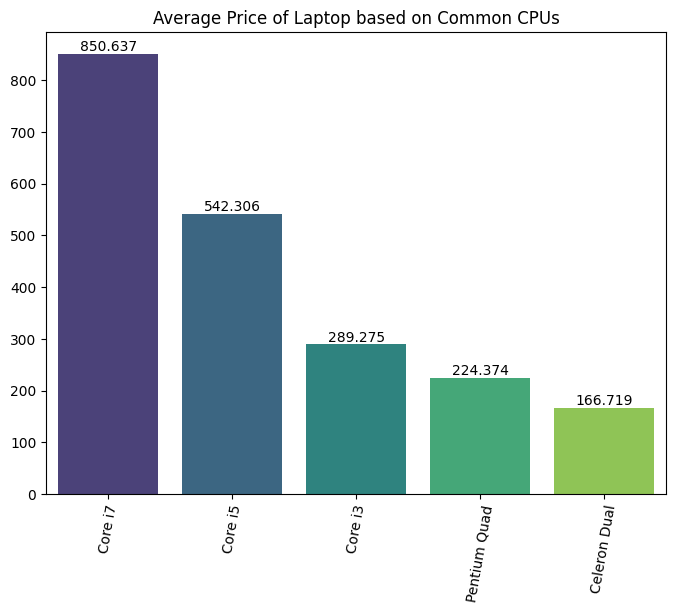

In [19]:
# Mendapatkan daftar 5 CPU yang paling umum
cpu_list = df['cpu_name'].value_counts()[:5].index.tolist()

# Mengelompokkan data berdasarkan CPU dan menghitung rata-rata harga
cpu_avg_price = df[df['cpu_name'].isin(cpu_list)].groupby('cpu_name')['price'].mean().sort_values(ascending=False)
cpu_avg_price = cpu_avg_price.reset_index()

plt.figure(figsize=(8,6))

# Membuat plot batang menggunakan seaborn berdasarkan rata-rata harga CPU
ax = sns.barplot(x='cpu_name', y='price', data=cpu_avg_price, palette='viridis')
plt.xticks(rotation=80)

# Menambahkan label pada setiap batang
for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Price of Laptop based on Common CPUs')
plt.xlabel('')
plt.ylabel('')
plt.show()


berdasarkan bar plot terlihat CPU Core i7 memiliki nilai harga rata-rata laptop paling tinggi, ini dikarenakan pengguna menginginkan processor yang cepat dan efektif untuk melakukan task, meskipun harganya mahal CPU core i7 banyak peminatnya dan bagi yang kurang anggaran pengguna banyak yang memilih ke Core i5 dan i3 yang kecepatan CPU dan efektifitas lumayan

***Insight*** 

- Pilihan Berdasarkan Kebutuhan: Pengguna laptop memilih prosesor berdasarkan kebutuhan mereka. Core i7, meskipun lebih mahal, menawarkan performa yang sangat tinggi dan cocok untuk tugas-tugas komputasi yang berat seperti pengolahan grafis, pengeditan video, dan gaming. Pengguna yang memerlukan kecepatan dan efisiensi tinggi cenderung memilih Core i7 meskipun dengan harga yang lebih tinggi.

- Pilihan Berdasarkan Anggaran: Core i5 dan Core i3 tetap menjadi pilihan populer karena memberikan keseimbangan antara performa yang cukup baik dan harga yang lebih terjangkau. Pengguna yang tidak memerlukan kecepatan ekstrem atau tidak memiliki anggaran besar cenderung memilih prosesor ini untuk kebutuhan sehari-hari seperti browsing web, penggunaan office, dan multimedia ringan.




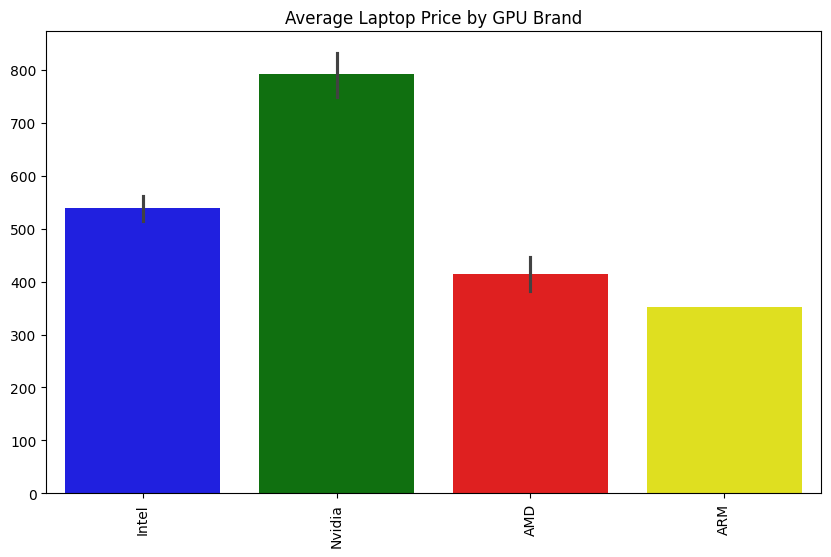

In [20]:
# Mendefinisikan warna khusus untuk setiap merek GPU
custom_palette = {'Intel': 'blue', 'Nvidia': 'green', 'AMD': 'red', 'ARM': 'yellow'}

# Membuat daftar warna berdasarkan nilai gpu_brand
colors = [custom_palette.get(brand, 'grey') for brand in df['gpu_brand'].unique()]

# Plotting dengan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=df['gpu_brand'], y=df['price'], estimator=np.mean, palette=colors)
plt.xlabel('')  # Menghapus label sumbu x
plt.ylabel('')  # Menghapus label sumbu y
plt.title('Average Laptop Price by GPU Brand')  # Menambahkan judul plot
plt.xticks(rotation='vertical')  
plt.show()  # Menampilkan plot


berdasarkan bar plot terlihat GPU Nvidia menempati posisi pertama sebagai harga laptop dengan rata-rata tertingi , sudah tidak diragukan lagi karena Nvidia adalah leading grafis saat ini terutama game grafis makanya harga GPU sanggat tinggi, Nvidia dengan GPU buatan merepa selalu menjadi incaran konsumer walaupun harga GPU yang sangat mahal tapi kualitas GPU ini sudah terbukti memang bagus. grafis lainya yaitu dibawah Nvidia adalah Intel dan AMD GPU buatan mereka memang tidak sebagus Nvidia tapi cukup untuk pengguna yang tidak memntingkan grafis atau tidak suka game

***Insight*** 

- Dominasi Pasar Gaming dan Grafis: Nvidia memimpin pasar GPU karena performanya yang unggul, terutama dalam hal gaming dan aplikasi grafis. Teknologi seperti ray tracing dan AI-driven enhancements yang diimplementasikan oleh Nvidia memberikan pengalaman visual yang superior, menjadikannya pilihan utama bagi gamer dan profesional di bidang kreatif.

- Segmen Pengguna Premium: Harga tinggi GPU Nvidia mencerminkan segmen pasar yang ditargetkan, yaitu pengguna dengan kebutuhan performa tinggi dan anggaran besar, seperti gamer hardcore, desainer grafis, dan profesional di bidang video editing. Mereka cenderung memilih GPU Nvidia meskipun harganya lebih tinggi karena menginginkan kualitas dan performa terbaik

- Pilihan Alternatif untuk Segmen Ekonomis: GPU dari Intel dan AMD menawarkan alternatif yang lebih terjangkau bagi pengguna dengan kebutuhan grafis yang tidak terlalu intensif. Mereka yang tidak bermain game berat atau tidak membutuhkan performa grafis tinggi, seperti mahasiswa, cenderung memilih laptop dengan GPU dari Intel atau AMD untuk menghemat biaya.

In [21]:
# Mengelompokkan data berdasarkan jumlah RAM dan menghitung persentase
ram = df.groupby("Ram").size() * 100 / len(df)
ram.name = "percentage"
ram = ram.reset_index()

# Membuat plot pie menggunakan plotly express berdasarkan persentase jumlah RAM
fig = px.pie(ram, names="Ram", values="percentage", title="Amount of RAMs is the Most Common in Laptops")
fig.update_layout({"legend_title": "RAM (GB)"})
fig.show()


berdasarkan pie chart di ketahui laptop dengan jumlah ram 8 adalah yang paling sering diikuti laptop dengan jumlah ram 4 dan 16 

***insight***
- Penggunaan RAM Sebagai Standar: RAM 8GB menjadi pilihan yang paling umum di antara pengguna laptop. Ini menunjukkan bahwa kebanyakan pengguna menganggap 8GB RAM cukup untuk kebutuhan sehari-hari, termasuk multitasking ringan, browsing web, dan aplikasi kantor.

- Pilihan Budget dan Kebutuhan: RAM 4GB yang menduduki posisi kedua menunjukkan bahwa ada segmen pasar yang masih memilih laptop dengan spesifikasi dasar atau budget terbatas. Penggunaan RAM 4GB biasanya memadai untuk tugas-tugas ringan seperti penggunaan kantor sederhana dan browsing internet.

- Kebutuhan Khusus dan Performa: RAM 16GB yang mengikuti di urutan ketiga menunjukkan adanya permintaan untuk performa lebih tinggi, terutama dari pengguna yang melakukan tugas-tugas berat seperti pengolahan data besar, desain grafis, atau pengeditan video. RAM 16GB memberikan lebih banyak ruang untuk multitasking intensif dan menjalankan aplikasi berat secara bersamaan.

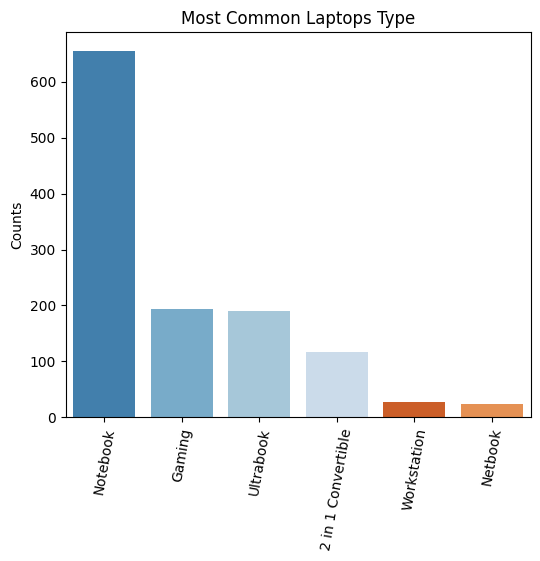

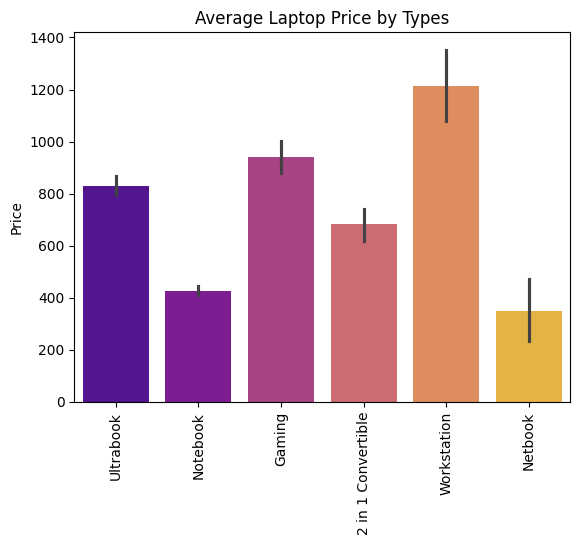

In [58]:
# Membuat subplots 
fig, ax = plt.subplots(figsize=(6,5))

# Membuat plot count menggunakan seaborn untuk jenis laptop yang paling umum
ax = sns.countplot(
    x='TypeName',  # Menggunakan kolom TypeName sebagai sumbu x
    data=df,  # Menggunakan dataframe df
    palette='tab20c',  # Memilih palet warna 'tab20c'
    order=df['TypeName'].value_counts().index  # Mengurutkan berdasarkan jumlah jenis laptop
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.title('Most Common Laptops Type')  
plt.xlabel('')  
plt.ylabel('Counts') 
plt.show()  

# Menggunakan seaborn untuk membuat bar plot
sns.barplot(
    x=df['TypeName'],  # Menggunakan kolom TypeName sebagai sumbu x
    y=df['price'],  # Menggunakan kolom price sebagai sumbu y
    palette='plasma'  # Memilih palet warna 'plasma'
)

# Menambahkan label sumbu y, judul, dan menghapus label sumbu x
plt.xticks(rotation='vertical')
plt.ylabel('Price') 
plt.title('Average Laptop Price by Types')  
plt.xlabel('') 
plt.show()  

berdasarkan bar plot terlihat notebook adalah laptop yang paling banyak di jual diikuti oleh gaming dan ultrabook tetapi rata-rata harga laptop menunjukan laptop tipe workstasion paling atas diikuti gaming dan ultrabook

***insight***

Popularitas laptop Berdasarkan Jenisnya:

- Notebook: Merupakan jenis laptop yang paling banyak dijual, menunjukkan bahwa laptop dengan desain umum dan multifungsi masih mendominasi pasar konsumen.
- Gaming: Meskipun tidak mendominasi pasar secara keseluruhan, tetapi memiliki pangsa pasar yang signifikan, menunjukkan popularitas yang tinggi di kalangan pengguna yang memprioritaskan performa grafis dan kecepatan untuk gaming.
- Ultrabook: Disebut sebagai laptop ringan dan tipis yang tetap kuat dalam hal kinerja, ultrabook menempati posisi yang signifikan, terutama di kalangan pengguna yang menginginkan portabilitas tinggi tanpa mengorbankan performa.

Rata-Rata Harga Berdasarkan Jenis Laptop:

- Workstation: Menunjukkan rata-rata harga tertinggi di antara jenis laptop lainnya. Ini mungkin disebabkan oleh spesifikasi yang lebih tinggi, seperti prosesor dan grafis yang kuat, RAM yang besar, dan penyimpanan yang luas, yang sering kali diperlukan oleh profesional dalam bidang seperti desain grafis, rekayasa, dan pengembangan software.
- Gaming: Meskipun tidak mendominasi penjualan seperti notebook, gaming laptop memiliki rata-rata harga yang signifikan. Hal ini terkait dengan kebutuhan akan grafis yang kuat dan kinerja yang optimal untuk memainkan game modern dengan lancar.
- Ultrabook: Meskipun populer dalam penjualan, ultrabook cenderung memiliki rata-rata harga yang lebih rendah dibandingkan dengan workstation dan gaming laptop. Ini mencerminkan orientasi pasar mereka yang lebih luas, termasuk pengguna yang membutuhkan portabilitas dan kinerja yang cukup untuk tugas sehari-hari.

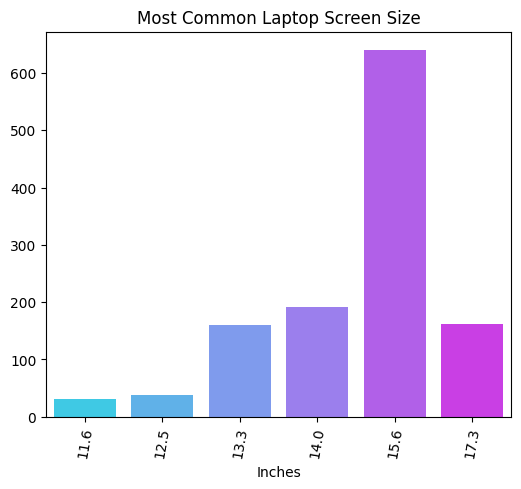

In [24]:
# Mengambil daftar enam ukuran layar laptop yang paling umum
inches_list = df['Inches'].value_counts().index[:6].tolist()

# Membuat DataFrame baru dengan data hanya untuk ukuran layar yang termasuk dalam inches_list
df_clean = df[df['Inches'].isin(inches_list)]
 
# Membuat subplot dengan ukuran gambar 6x5 inch
fig, ax = plt.subplots(figsize=(6,5))

# Membuat count plot menggunakan seaborn untuk menghitung jumlah laptop berdasarkan ukuran layar
ax = sns.countplot(x='Inches', data=df_clean, palette='cool')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.title('Most Common Laptop Screen Size')
plt.ylabel('')
plt.show()


berdasarkan ukuran layar , laptop dengan layar 15.6 inch adalah yang paling banyak di pasar diikuti oleh 14 inch ,17.3 inch dan 13.3 inch

***insight***

- Dominasi Ukuran Layar 15.6 Inch: Ukuran layar 15.6 inch mendominasi pasar laptop. Hal ini bisa disebabkan karena ukuran ini sering dianggap sebagai titik tengah yang cocok untuk berbagai kegiatan, seperti produktivitas, hiburan, dan penggunaan sehari-hari. Laptop dengan layar 15.6 inch menawarkan keseimbangan antara ukuran layar yang cukup besar untuk pengalaman visual yang nyaman, namun tidak terlalu besar sehingga masih cukup portabel.

- Pilihan 14 Inch: Ukuran layar 14 inch merupakan pilihan kedua yang populer. Laptop dengan layar 14 inch menawarkan kombinasi antara portabilitas yang lebih baik dibandingkan 15.6 inch dan ukuran layar yang masih cukup besar untuk produktivitas.

- Ukuran Layar Besar (17.3 Inch): Meskipun lebih jarang dibandingkan dengan ukuran 15.6 dan 14 inch, laptop dengan layar 17.3 inch menunjukkan adanya pasar yang cukup signifikan. Ukuran layar besar ini cocok untuk penggunaan yang membutuhkan ruang tampilan yang lebih besar, seperti editing grafis atau penggunaan rumah tangga yang membutuhkan layar yang lebih besar untuk hiburan.

In [25]:
# Mengelompokkan data berdasarkan sistem operasi dan menghitung jumlahnya
operating_systems = df.groupby("OpSys").size().sort_values(ascending=False)
operating_systems.name = "Jumlah laptop"
operating_systems = operating_systems.reset_index()

# Membuat plot batang menggunakan plotly express
fig = px.bar(operating_systems, x="Jumlah laptop", y="OpSys", color="OpSys", title="Most Used Operating Systems in Laptops")
fig.update_yaxes(title_text='')
fig.update_xaxes(title_text='')
fig.update_layout(legend_title_text='Operating Systems')
fig.show()

# Mengelompokkan data berdasarkan sistem operasi dan menghitung rata-rata harga
operating_systems = df.groupby("OpSys")['price'].mean().sort_values(ascending=False)
operating_systems.name = "Rata-rata harga"
operating_systems = operating_systems.reset_index()

# Membuat plot batang menggunakan plotly express
fig = px.bar(operating_systems, x="Rata-rata harga", y="OpSys", color="OpSys", title="Average Price of Laptops based on Operating Systems")
fig.update_yaxes(title_text='')
fig.update_xaxes(title_text='')
fig.update_layout(legend_title_text='Operating Systems')# Mengubah judul legend
fig.show()# Menampilkan plot



sistem operasi paling banyak pada laptop adalah windows dikuti oleh macos tetapi pada rata-rata harga laptop macos berada di atas windows 

***insight***
Dominasi Windows: Windows secara jelas mendominasi pasar laptop dengan pangsa pasar yang lebih besar daripada macOS. Hal ini mungkin disebabkan oleh faktor-faktor seperti ketersediaan lebih luas, kompatibilitas dengan berbagai perangkat lunak, serta berbagai pilihan harga dari berbagai produsen.

Rata-Rata Harga macOS yang Lebih Tinggi: Meskipun macOS memiliki pangsa pasar yang lebih kecil dibandingkan dengan Windows, rata-rata harga laptop dengan macOS cenderung lebih tinggi. Hal ini dapat dijelaskan oleh beberapa faktor:

- Target Pasar: macOS sering kali lebih populer di kalangan pengguna profesional, kreatif, dan pengguna yang mencari pengalaman penggunaan yang seragam dengan produk-produk Apple lainnya. Kelompok pengguna ini sering kali bersedia membayar lebih untuk fitur-fitur dan ekosistem yang terintegrasi dengan baik.

- Ekosistem Premium: Produk MacBook dan sistem operasi macOS dikenal dengan kualitas dan desain premium mereka, yang sering kali menjadi pilihan untuk pengguna yang memprioritaskan keandalan, performa, dan desain estetika.

setelah EDA dilakukan penghapusan  variabel cpu_name

In [26]:
# Menghapus kolom index
df = df.drop(['cpu_name'], axis=1)
df.head()

,Company,TypeName,Inches,screen_size,resolution_width,resolution_height,ips_panel,touchscreen,cpu_brand,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price,ppi,cpu_performance
0,HP,Ultrabook,12.5,small,3840,2160,1,1,Intel,1.2,8,SSD,512.0,0,Intel,windows,0.97,1073.06,352,high end
1,Asus,Notebook,17.3,large,1920,1080,0,0,Intel,1.8,8,Hybrid,128.0,1024,Nvidia,windows,2.10,610.06,127,high end
2,Apple,Ultrabook,13.3,small,2560,1600,1,0,Intel,2.3,8,SSD,128.0,0,Intel,macos,1.37,713.79,227,high end
3,Asus,Notebook,17.3,large,1366,768,0,0,Intel,1.1,4,HDD,1024.0,0,Nvidia,windows,2.80,248.28,91,low end
4,Asus,Notebook,15.6,medium,1920,1080,0,0,Intel,1.1,4,HDD,1024.0,0,Intel,windows,2.00,183.28,141,low end



---

## <a id="class5">**4. Feature Engineering**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/256/2861/2861721.png" alt="drawing" width="64" align="center"/></a>

---

pada milestone 2 tahapan  feature engineering penerapannya dipisah jadi 2 ,tahapan satu dilakukan di luar pipeline yaitu handling missing value, split data dan feature selection lalu . tahapan satunya lagi dilakukan didalam pipeline yaitu scaling dan encoding

Ketika cara2 sebelum milestone saat membagi dataset, pertama-tama akan dibagi menjadi dua bagian: set pelatihan (train-set) dan set pengujian (test-set). Kemudian, berbagai kombinasi hiperparameter dari suatu algoritma dicoba Namun, hal ini dapat menyebabkan overfitting.
untuk itu digunakan pipeline untuk mencegah agar overfitting tidak terjadi

berikut ini adalah struktur langkah milestone 2:

- Langkah 1: Bagi dataset menjadi 3 bagian: train-set, validation-set, dan test-set.
- Langkah 2: Coba berbagai kombinasi hyperparameter menggunakan train-set dan validation-set.
- Langkah 3: Pilih model terbaik berdasarkan kinerja train-set dan validation-set.
- Langkah 4: Hanya model terbaik yang akan diuji terhadap test-set.

## A. missing value handling 

In [27]:
# Menampilkan jumlah nilai kosong (null) dalam setiap kolom DataFrame
print(df.isnull().sum())

Company               0
TypeName              0
Inches                0
screen_size           0
resolution_width      0
resolution_height     0
ips_panel             0
touchscreen           0
cpu_brand             0
cpu_speed             0
Ram                   0
memory_type           1
primary_storage       1
secondary_storage     0
gpu_brand             0
OpSys                63
Weight                0
price                 0
ppi                   0
cpu_performance       0
dtype: int64


setelah dilakukan pengecekan terlihat dataset memiliki missing value di variabel OpSys sebanyak 63 serta di variabel memory_type dan primary_storage masing-masing sebanyak 1 missing value. 

In [28]:
# Menghitung persentase nilai kosong (null) dalam setiap kolom DataFrame
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Company              0.000000
TypeName             0.000000
Inches               0.000000
screen_size          0.000000
resolution_width     0.000000
resolution_height    0.000000
ips_panel            0.000000
touchscreen          0.000000
cpu_brand            0.000000
cpu_speed            0.000000
Ram                  0.000000
memory_type          0.078616
primary_storage      0.078616
secondary_storage    0.000000
gpu_brand            0.000000
OpSys                4.952830
Weight               0.000000
price                0.000000
ppi                  0.000000
cpu_performance      0.000000
dtype: float64


setelah dilakukan pengecekan lagi terlihat dataset memiliki missing value di variabel OpSys sebanyak 4.9 persen serta di variabel memory_type dan primary_storage masing-masing memiliki missing value sebanyak 0.078 persen

karena missing value nya tidak terlalu banyak maka langkah handling missing value yang diambil adalah dengan menghapus data tersebut 

In [29]:
df.dropna(inplace=True)

## B. Split Train-Test

dataset dipisah menjadi X dan y
- X sebagai variabel dependent atau bergantung pada fitur yaitu price 
- y sebagai variabel independent atau tidak bergantung pada variabel (kolom selain price)

- kemudian data dipisah lagi di X menjadi 80% data latih (X_train) dan 20% data testing (X_test)
- begitu juga data di y dipisah lagi menjadi 80% data test (y_train) dan 20% data testing (y_test)

In [30]:
# Menentukan fitur dan variabel target
X = df.drop('price', axis=1)  # Memisahkan kolom 'price' sebagai variabel target
y = df['price']  # Variabel yang akan diprediksi

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)  # Membagi data dengan ukuran set pengujian sebesar 20% dan random state 55


In [31]:
# Memilih kolom numerik dan kategorikal

# Memilih kolom dengan tipe data object dan category
category_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  
# Memilih kolom dengan tipe data int64 dan float64
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() 

# Mencetak kolom kategorikal
print('Category Columns: ', category_columns)  
# Mencetak kolom numerik
print('Numeric Columns: ', numeric_columns)  


Category Columns:  ['Company', 'TypeName', 'screen_size', 'cpu_brand', 'memory_type', 'gpu_brand', 'OpSys', 'cpu_performance']
Numeric Columns:  ['Inches', 'resolution_width', 'resolution_height', 'ips_panel', 'touchscreen', 'cpu_speed', 'Ram', 'primary_storage', 'secondary_storage', 'Weight', 'ppi']


## C. Outlier handling (Checking outlier) 

pada tahapan ini dilakukan pengecekan distribusi data, data dicek apakah memiliki distribusi normal dan mengecek ada tidaknya skew pada data. <br>
sebelumnya data yang digunakan adalah data numerik untuk itu dipisahkan kolom numerik dari data <br>
kolom numerik ini lalu di pisah lagi menjadi kelompok kolom yang memiliki distribusi normal dan kolom dengan distribusi tidak normal atau memiliki skew sebagai berikut :<br>


In [32]:
# Membuat data dan kolom untuk distribusi normal
data_normal = []
column_normal = []

# Membuat data dan kolom untuk distribusi skew
data_skewed = []
column_skewed = []

# Loop untuk setiap kolom numerik untuk memfilter distribusi data menjadi kolom yang terdistribusi normal atau skew
for num in numeric_columns:
    skewness = X_train[num].skew()

    # Jika data terdistribusi secara normal
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    # Jika data memiliki skewness negatif rendah
    elif skewness < -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # Jika data memiliki skewness positif rendah
    elif skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # Jika data memiliki skewness negatif sedang
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data memiliki skewness positif sedang
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])


In [33]:
# Menampilkan kolom yang berdistribusi normal
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness


In [34]:
# Menampilkan kolom yang berdistribusi skewed
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,Inches,4.209252,high
1,resolution_width,2.175658,high
2,resolution_height,2.074679,high
3,ips_panel,0.989980,low
4,touchscreen,1.973730,high
5,cpu_speed,-0.846017,low
6,Ram,3.351816,high
7,primary_storage,1.628179,high
8,secondary_storage,2.213824,high
9,Weight,2.054974,high


setelah dicek  telihat semua variabel di dataset memiliki outlier sehingga dataset distribusinya miring atau skew<br>
setelah dilakukan pengecekan diketahui bahwa dataset memiliki skew yang tinggi. <br>
maka dari itu dilakukan handling outlier pada datataset <br>

- outlier handling akan dilakukan di dalam pipeline bersama dengan feature engineer lainnya <br>
- outlier handling yang dilakukan adalah censoring yang disebut juga winsorization atau capping yang berarti membatasi nilai maksimum dan minimum <br>
- karena datasetnya distribusi miring maka capping oulier dilakukan menggunakan metode IQR atau Interquartile range<br>
  (nilai fold atau jumlah IQR dari median ditetapkan menjadi 1.5. yang berarti nilai yang lebih dari 1.5 kali IQR dari median akan dicapping)

In [35]:
# Membagi fitur pelatihan dan pengujian ke dalam kolom numerik dan kategorikal

# Mengambil kolom kategorikal dari X_train_capped
X_train_cat = X_train[category_columns]  

# Mengambil kolom numerik dari X_train_capped
X_train_num = X_train[numeric_columns]  

## D. Feature Selection

menseleksi fitur-fitur mana yang kira-kira memiliki relasi dengan variabel price<br>
seleksi dilakukan dengan menentuhkan fitur yang penting atau memiliki pengaruh besar pada target price yang akan diprediksi<br>
seleksi dilakukan pada kolom numerik dan kategori untuk itu data dipisah menjadi kolom kategorikal dan kolom numerikal 
- seleksi dilakukan dengan cara menghitung nilai coefisien korelasi
- seleksi pada kolom kategorikal menggunakan metode kendall <br>
  (dengan nilai coefisien korelasi lebih dari 0.1 berarti menunjukan variabel itu penting)
- seleksi pada kolom numerical menggunakan metode sperman. metode sperman dipakai karena distribusi data skew <br>
  (dengan variabel yang memiliki nilai coefisien korelasi lebih dari 0.1 berarti menunjukan variabel itu penting)

In [36]:
# Inisialisasi list untuk menyimpan hasil
interpretation = []  # List untuk menyimpan interpretasi (signifikan atau tidak)
cols = []  # List untuk menyimpan nama kolom
corr = []  # List untuk menyimpan koefisien korelasi
selected_cat_cols = []  # List untuk menyimpan kolom kategorikal yang signifikan
p_values = []  # List untuk menyimpan nilai p

# Ambang batas untuk signifikansi koefisien korelasi
correlation_threshold = 0.1

# Iterasi melalui kolom-kolom kategorikal dan lakukan analisis korelasi Kendall's Tau
for col in X_train_cat.columns:
    corr_coef, p_value = kendalltau(X_train_cat[col], y_train)  # Menghitung koefisien korelasi menggunakan Kendall Tau
    
    cols.append(col)  # Menambahkan nama kolom ke dalam list
    corr.append(corr_coef)
    p_values.append(p_value)
    
    # Menentukan signifikansi berdasarkan nilai absolut koefisien korelasi
    if abs(corr_coef) > correlation_threshold:
        interpretation.append('Signifikan')  # Menandai kolom sebagai signifikan
        selected_cat_cols.append(col)  # Menambahkan kolom signifikan ke dalam list
    else:
        interpretation.append('Tidak Signifikan')  # Menandai kolom sebagai tidak signifikan

# Membuat DataFrame untuk menampilkan hasil
pd.DataFrame({
    'Nama Kolom': cols,
    'Koefisien Korelasi': corr,
    'Nilai P': p_values,
    'Korelasi': interpretation
})


,Nama Kolom,Koefisien Korelasi,Nilai P,Korelasi
0,Company,0.177105,1.820468e-14,Signifikan
1,TypeName,0.001684,9.450725e-01,Tidak Signifikan
2,screen_size,-0.021807,3.890909e-01,Tidak Signifikan
3,cpu_brand,0.191116,3.732444e-13,Signifikan
4,memory_type,0.380608,1.338681e-53,Signifikan
5,gpu_brand,0.298432,2.589104e-32,Signifikan
6,OpSys,0.150105,7.545661e-09,Signifikan
7,cpu_performance,-0.435349,3.531175e-63,Signifikan


In [37]:
# Inisialisasi list untuk menyimpan hasil
interpretation = []  # List untuk menyimpan interpretasi (signifikan atau tidak)
cols = []  # List untuk menyimpan nama kolom
corr = []  # List untuk menyimpan koefisien korelasi
selected_num_cols = []  # List untuk menyimpan kolom numerik yang signifikan
p_values = []  # List untuk menyimpan nilai p

# Ambang batas untuk signifikansi koefisien korelasi
correlation_threshold = 0.1

for col in X_train_num.columns:
    # Selalu gunakan korelasi Spearman untuk data yang miring
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)  # Menghitung koefisien korelasi menggunakan Spearman
    corr.append(corr_coef)  # Menambahkan koefisien korelasi ke dalam list
    cols.append(col)  # Menambahkan nama kolom ke dalam list
    p_values.append(p_value)
    
    # Memeriksa koefisien korelasi untuk signifikansi
    if abs(corr_coef) > correlation_threshold:
        interpretation.append('Signifikan')  # Menandai kolom sebagai signifikan
        selected_num_cols.append(col)  # Menambahkan kolom signifikan ke dalam list
    else:
        interpretation.append('Tidak Signifikan')  # Menandai kolom sebagai tidak signifikan

# Membuat DataFrame untuk menampilkan hasil
pd.DataFrame({
    'Nama Kolom': cols,
    'Koefisien Korelasi': corr,
    'Nilai P': p_values,
    'Korelasi': interpretation
})


,Nama Kolom,Koefisien Korelasi,Nilai P,Korelasi
0,Inches,-0.023819,4.596370e-01,Tidak Signifikan
1,resolution_width,0.631981,7.699864e-109,Signifikan
2,resolution_height,0.623661,3.177040e-105,Signifikan
3,ips_panel,0.282661,3.330732e-19,Signifikan
4,touchscreen,0.195179,9.515265e-10,Signifikan
5,cpu_speed,0.522439,9.263540e-69,Signifikan
6,Ram,0.769872,3.166718e-190,Signifikan
7,primary_storage,0.017923,5.779609e-01,Tidak Signifikan
8,secondary_storage,0.337718,3.374116e-27,Signifikan
9,Weight,-0.037031,2.502007e-01,Tidak Signifikan


- sesuai dengan fitur seleksi variabel yang memiliki  nilai coefisien korelasi dibawah 0.1 dianggap tidak penting dan tidak digunakan pada proses lebih lanjut
- berdasarkan hasil fitur seleksi didapatkan variabel penting yang memiliki pengaruh terhadapa price
- variabel ini adalah variabel kategorikal yaitu Company, cpu_brand, memory_type, gpu_brand, OpSys, cpu_performance
- dan variabel numerikal yaitu resolution_width, resolution_height, ips_panel, touchscreen, cpu_speed, Ram, secondary_storage, ppi
- fitur-fitur penting ini yang akan diproses lebih lanjut di dalam pipeline


In [38]:
# Show selected columns based on the correlation test
print(selected_cat_cols)
print(selected_num_cols)

['Company', 'cpu_brand', 'memory_type', 'gpu_brand', 'OpSys', 'cpu_performance']
['resolution_width', 'resolution_height', 'ips_panel', 'touchscreen', 'cpu_speed', 'Ram', 'secondary_storage', 'ppi']


In [39]:
# Memperbarui kolom-kolom kategorikal dan numerik berdasarkan yang telah dipilih

# Memilih kolom kategorikal yang signifikan untuk data pelatihan
X_train_categorical = X_train_cat[selected_cat_cols]  
# Memilih kolom numerik yang signifikan untuk data pelatihan
X_train_numerical = X_train_num[selected_num_cols]  


In [40]:
X_train_categorical

,Company,cpu_brand,memory_type,gpu_brand,OpSys,cpu_performance
395,Acer,Intel,HDD,Nvidia,linux,high end
178,Huawei,Intel,SSD,Intel,windows,high end
1106,Asus,Intel,HDD,Intel,windows,low end
320,Dell,Intel,HDD,Intel,windows,high end
386,Asus,Intel,HDD,Intel,windows,low end
...,...,...,...,...,...,...
577,MSI,Intel,SSD,Nvidia,windows,high end
1020,Acer,Intel,HDD,Intel,windows,low end
318,Asus,AMD,Hybrid,AMD,windows,medium end
709,Acer,Intel,Hybrid,Nvidia,windows,high end


In [41]:
X_train_numerical

,resolution_width,resolution_height,ips_panel,touchscreen,cpu_speed,Ram,secondary_storage,ppi
395,1920,1080,0,0,2.5,8,0,141
178,2160,1440,1,0,2.7,8,0,200
1106,1366,768,0,0,1.6,4,0,100
320,1366,768,0,1,2.5,8,0,100
386,1366,768,0,0,1.1,4,0,100
...,...,...,...,...,...,...,...,...
577,1920,1080,0,0,2.8,8,0,127
1020,1366,768,0,0,2.0,4,0,100
318,1920,1080,0,0,3.2,8,1024,127
709,1920,1080,1,0,2.8,16,1024,127


## 5.  Pipelines

pada milestone 2 sebagian struktur feature engineering dilakukan di dalam pipeline dengan bantuan column transformer

ColumnTransformer sebagai fitur serbaguna yang memungkinkan untuk menerapkan teknik prapemrosesan dan transformasi yang berbeda ke subset kolom yang berbeda dalam dataset di dalam pipeline. Ini sangat berguna saat menangani dataset yang mengandung campuran fitur numerik dan kategorikal, yang masing-masing memerlukan langkah prapemrosesan yang berbeda. ColumnTransformer memungkinkan untuk mendefinisikan langkah prapemrosesan mana yang harus diterapkan pada subset kolom tertentu, memastikan bahwa setiap fitur diproses dengan tepat sebelum digunakan oleh model.

Pipeline mendefinisikan rangkaian transformasi yang diterapkan pada dataset  secara berurutan, di mana langkah terakhir dalam rantai adalah model pembelajaran mesin seperti regressor. <br>
alasan digunakannya Pipeline untuk mendefinisikan model:

- memungkinkan  untuk menyimpan semua definisi dan komponen model  di satu tempat, yang membuatnya lebih mudah untuk menggunakan kembali model atau mengubahnya di masa depan.
- Pipeline secara otomatis melakukan operasi yang relevan ketika diterapkan pada set pelatihan dan pengujian. Misalnya, dalam fase pelatihan, ia memanggil metode .fit_transform() dari semua transformer, sementara dalam fase prediksi/pengujian, ia memanggil metode .transform() dan .predict() hanya dari algoritma pemodelan.
- Dengan menggunakan pipeline untuk merangkai semua transformasi dalam prosedur, dapat dengan  memahami alur kerja dalam satu pandangan. Dengan pengaturan ini, akan lebih mudah untuk melakukan modifikasi dan menemukan potensi kesalahan di awal.

cara kerja pipeline : 
- membuat transformer yang memisah numeric dan categorical feature.
- semua feature hasil feature selection dimasukan ke transformer
- numeric_feature diolah di pipeline oleh numeric transformer menggunakan winsorizer metode capping iqr
- setelah itu dilakukan scaling menggunakan RobustScaler 
- alasan digunakannya RobustScaler karena dataset memiliki banyak outlier yang tinggi
- selanjutnya categorical_feature diolah oleh categorical_transformer dengan melakukan encoding dengan bantuan OneHotEncoder
- alasan digunakannya OneHotEncoder karena variabel category yang ada di categorical_transformer memiliki kardinalitas yang relatif sedikit
- kemudian untuk variabel category cpu_performance karena memiliki nilai ordingal untuk itu dilakukan encoding menggunakan OrdinalEncoder
- lalu untuk variabel numeric ips_panel, touchscreen, secondary_storage, resolution_width ,resolution_height yang memiliki nilai biner dan kardinalitasnya rendah akan dilakukan scaling menggunakan MinMaxScaler
- alasan digunakannya MinMaxScaler karena rangenya akan tetap di 0 dan 1 sehingga tidak akan berpengaruh pada nilai biner dan bagus dipakai pada variabel yang unique value nya memili variance yg sedikit
- semua transformer ini diolah oleh processor dan akan dilatih nanti dengan model




In [42]:
# Definisikan fitur numerik
numeric_features = ['cpu_speed', 'Ram', 'ppi']

# Membuat transformer untuk fitur numerik dengan pipeline yang mencakup Winsorizer dan RobustScaler
numeric_transformer = Pipeline(
    steps=[("outlier", Winsorizer(capping_method='iqr', tail='both', fold=1.5)), ("scaler", RobustScaler())]
)

# Definisikan fitur kategorikal
categorical_features = ['Company', 'cpu_brand', 'memory_type', 'gpu_brand', 'OpSys']

# Membuat transformer untuk fitur kategorikal dengan OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Definisikan fitur ordinal
ordinal_features = ['cpu_performance']

# Membuat transformer untuk fitur ordinal dengan OrdinalEncoder
ord_transformer = OrdinalEncoder()

# Definisikan fitur yang akan di-transformasi dengan MinMaxScaler
minmax_features = ['ips_panel', 'touchscreen','secondary_storage','resolution_width','resolution_height']

# Membuat transformer untuk fitur dengan MinMaxScaler
minmax_transformer = MinMaxScaler()

# Membuat ColumnTransformer untuk menggabungkan semua transformer di atas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Transformasi fitur numerik
        ('cat', categorical_transformer, categorical_features),  # Transformasi fitur kategorikal
        ('ord', ord_transformer, ordinal_features),  # Transformasi fitur ordinal
        ('minmax', minmax_transformer, minmax_features)  # Transformasi fitur dengan MinMaxScaler
    ]
)


## 6. Model Definition

- melakukan definisi model LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR,KNeighborsRegressor dan XGBRegressor
- model-model ini dimasukan ke pipeline sebagai reg1,reg2 sampai reg6
- setiap model memiliki pipelinenya masing-masing
- data hasil preprocessor dilatih satu-persatu oleh pipeline model secara berurutan
- hasil pelatihan akan dievaluasi kinerjanya oleh crossvalidation nanti

In [43]:
# Membuat pipeline untuk regresi linear
reg1 = Pipeline([
    ("preprocessor", preprocessor),  # Langkah pra-pemrosesan
    ("regressor_linear", LinearRegression())  # Model regresi linear
])

# Membuat pipeline untuk regresi pohon keputusan
reg2 = Pipeline([
    ("preprocessor", preprocessor),  # Langkah pra-pemrosesan
    ("regressor_dtree", DecisionTreeRegressor())  # Model regresi pohon keputusan
])

# Membuat pipeline untuk regresi hutan acak
reg3 = Pipeline([
    ("preprocessor", preprocessor),  # Langkah pra-pemrosesan
    ("regressor_rforest", RandomForestRegressor())  # Model regresi hutan acak
])

# Membuat pipeline untuk regresi support vector
reg4 = Pipeline([
    ("preprocessor", preprocessor),  # Langkah pra-pemrosesan
    ("regressor_svr", SVR())  # Model regresi support vector
])

# Membuat pipeline untuk regresi k-nearest neighbors
reg5 = Pipeline([
    ("preprocessor", preprocessor),  # Langkah pra-pemrosesan
    ("regressor_knn", KNeighborsRegressor())  # Model regresi k-nearest neighbors
])

# Membuat pipeline untuk regresi XGBoost
reg6 = Pipeline([
    ("preprocessor", preprocessor),  # Langkah pra-pemrosesan
    ("regressor_xg", XGBRegressor())  # Model regresi XGBoost
])


## 7. Model Training

6 model lalu dilakukan pelatihan pada X_train dan y_train

In [44]:
# Melatih model regresi linear dengan data pelatihan
reg1.fit(X_train, y_train)

# Melatih model regresi pohon keputusan dengan data pelatihan
reg2.fit(X_train, y_train)

# Melatih model regresi hutan acak dengan data pelatihan
reg3.fit(X_train, y_train)

# Melatih model regresi support vector dengan data pelatihan
reg4.fit(X_train, y_train)

# Melatih model regresi k-nearest neighbors dengan data pelatihan
reg5.fit(X_train, y_train)

# Melatih model regresi XGBoost dengan data pelatihan
reg6.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['cpu_speed', 'Ram', 'ppi']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'cpu_brand',
                                                   'memory_type', 'gpu_brand',
                                                   'OpSys']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['cpu_perform...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

## 8. Cross Validation

Cross Validation digunakan untuk memperkirakan kinerja model pada data yang belum pernah dilihat sebelumnya. <br> 
alasan digunakannya Cross Validation: <br>
- Cross-validation secara sistematis membuat dan mengevaluasi beberapa model pada beberapa subset dari dataset.
- Memberikan pengukuran kinerja seperti rata-rata dan standar deviasi.<br>
 Rata-rata: seberapa baik prosedur bekerja secara keseluruhan. <br>
 Standar deviasi: seberapa besar variasi yang diharapkan dalam praktek.<br>
- Rata-rata dan standar deviasi dapat digunakan untuk memberikan interval kepercayaan pada kinerja yang diharapkan di test set.


Langkah-langkah cross-validation:

- Bagi secara acak seluruh train set Anda menjadi k jumlah lipatan (subsets).
- Untuk setiap lipatan dalam train set , bangun model pada k-1 lipatan dari train set. Kemudian, uji model terhadap validation set untuk memeriksa efektivitas untuk lipatan ke-k.
- Ulangi dua langkah ini sampai masing-masing dari k lipatan telah berfungsi sebagai validation set.
- Rata-rata dari k akurasi disebut Cross Validation accuracy dan akan berfungsi sebagai metrik kinerja untuk model.
- nilai K yang paling umum digunakan adalah 5 atau 10.

In [45]:
# Menggunakan KFold untuk cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=66)

# Melakukan cross-validation dengan neg_root_mean_squared_error sebagai scoring
cv_linear_model = cross_val_score(reg1, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error")
cv_dtree_model = cross_val_score(reg2, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error")
cv_rforest_model = cross_val_score(reg3, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error")
cv_svr_model = cross_val_score(reg4, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error")
cv_knn_model = cross_val_score(reg5, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error")
cv_xgb_model = cross_val_score(reg6, X_train, y_train, cv=kf, scoring="neg_root_mean_squared_error")

# Nama model yang digunakan
model_name = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regressor', 'Support Vector Regression', 'K-Neighbors Regressor', 'XGBoost Regression']

# Inisialisasi nilai terbaik untuk cross-validation
best_model_name = ""
best_cv_score = float('inf')

# Loop melalui hasil cross-validation untuk setiap model
for cv, name in zip([cv_linear_model, cv_dtree_model, cv_rforest_model, cv_svr_model, cv_knn_model, cv_xgb_model], model_name ):
    cv = -cv  # Mengonversi RMSE negatif menjadi positif
    print(name)
    print('RMSE - Cross Validation Scores: ', cv)
    print('RMSE - Mean Cross Validation Score: ', cv.mean())
    print('RMSE - Standard Deviation of Cross Validation Scores: ', cv.std())
    print('RMSE - Range of Cross Validation Scores: ', (cv.mean() - cv.std()), 'to', (cv.mean() + cv.std()))
    print('-'*50)    

    # Memperbarui model terbaik berdasarkan mean cross-validation score
    if cv.mean() < best_cv_score:
        best_cv_score = cv.mean()
        best_model_name = name

# Menampilkan model terbaik dan nilai RMSE mean cross-validation
print('Best model:', best_model_name)
print('Cross-val mean RMSE of the best model:', best_cv_score)


Linear Regression
RMSE - Cross Validation Scores:  [238.02878709 316.94795889 212.55921458 188.43932564 215.98651872]
RMSE - Mean Cross Validation Score:  234.39236098496826
RMSE - Standard Deviation of Cross Validation Scores:  44.171921193472876
RMSE - Range of Cross Validation Scores:  190.22043979149538 to 278.56428217844115
--------------------------------------------------
Decision Tree Regression
RMSE - Cross Validation Scores:  [223.04605882 305.65973111 220.92058808 235.96040704 192.62745006]
RMSE - Mean Cross Validation Score:  235.64284702259675
RMSE - Standard Deviation of Cross Validation Scores:  37.75768334578715
RMSE - Range of Cross Validation Scores:  197.8851636768096 to 273.4005303683839
--------------------------------------------------
Random Forest Regressor
RMSE - Cross Validation Scores:  [186.86239541 255.80484294 182.96569819 182.46634069 167.64109517]
RMSE - Mean Cross Validation Score:  195.14807448021588
RMSE - Standard Deviation of Cross Validation Scores

didapatkan hasil model terbaik  adalah  Random Forest Regressor dengan Cross-val mean RMSE nya sebesar 195.14

berdasarkan cross validation didapat random forest regressor sebagai model terbaik <br>
langkah berikutnya menggunakan hyperparameter tuning untuk mencari hyperparameter terbaik untuk model random forest regressor 

## 9. Hyperparameter Tuning

alasan menggunakan Random Search:
- Metode ini akan melatih kombinasi hyperparameter secara acak.
- Tidak semua kombinasi yang mungkin akan dilatih.
- dapat mengurangi waktu komputasi

In [46]:
# Menggabungkan preprocessing dengan RandomForestRegressor dalam sebuah Pipeline
pipe_randomcv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Mendefinisikan penilai RMSE kustom
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

custom_rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Mendefinisikan rentang hyperparameter untuk RandomForestRegressor
param_dist_rforest = {
    'regressor__n_estimators': randint(20, 200),  # Jumlah pohon dalam hutan
    'regressor__max_leaf_nodes': randint(10, 50),  # Jumlah maksimum simpul daun dalam setiap pohon
    'regressor__max_depth': randint(10, 50),  # Kedalaman maksimum dari pohon
    'regressor__min_samples_split': randint(2, 10),  # Minimum sampel yang dibutuhkan untuk membagi node internal
    'regressor__min_samples_leaf': randint(1, 10)  # Minimum sampel yang dibutuhkan untuk menjadi simpul daun
}

# Melakukan Randomized Search pada pipeline
rforest_randomcv = RandomizedSearchCV(estimator=pipe_randomcv,
                                      param_distributions=param_dist_rforest,
                                      n_iter=20,
                                      cv=5,
                                      random_state=99,
                                      scoring= custom_rmse_scorer,
                                      n_jobs=-1)

# Melatih model
rforest_randomcv.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['cpu_speed',
                                                                                'Ram',
                                                                                'ppi']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Company',
                                                                                'cpu_brand',
                                                                                'memory_type',
                                                                                'gpu_brand',
                                                                                'OpSys']),
                                                                              ('o...
                                        'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17d9fcd70>,
                                        'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17cff4800>,
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17cff4ef0>},
                   random_state=99,
                   scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [47]:
rforest_randomcv.best_params_

{'regressor__max_depth': 37,
 'regressor__max_leaf_nodes': 47,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 5,
 'regressor__n_estimators': 155}

didapatkan hyperparameter terbaik hasil dari random search<br>
max_depth = 37, max_leaf_nodes = 47 , min_samples_leaf = 1 , min_samples_split = 5 , n_estimators = 155 <br>
hyperparameter terbaik ini yang akan dipakai oleh model random forest regressor 

In [48]:
rforest_randomcv.scorer_

make_scorer(rmse, greater_is_better=False, response_method='predict')

In [49]:
rforest_randomcv.best_score_

-191.56264272795823

In [50]:
pd.DataFrame(rforest_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__max_leaf_nodes,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.184660,0.012636,0.016349,0.007713,11,45,9,3,88,"{'regressor__max_depth': 11, 'regressor__max_l...",-173.019739,-180.946088,-199.387471,-263.324150,-227.425387,-208.820567,33.058884,15
1,0.118967,0.031557,0.013554,0.006237,15,11,8,8,55,"{'regressor__max_depth': 15, 'regressor__max_l...",-179.129723,-194.302047,-205.887157,-274.863042,-238.854177,-218.607229,34.309389,19
2,0.435931,0.029272,0.027099,0.005665,11,39,7,5,150,"{'regressor__max_depth': 11, 'regressor__max_l...",-175.535873,-179.687743,-198.874162,-252.787448,-214.735906,-204.324226,28.008983,10
3,0.126530,0.029133,0.018094,0.012320,10,22,9,2,40,"{'regressor__max_depth': 10, 'regressor__max_l...",-173.018427,-182.350876,-199.395983,-264.583349,-230.950093,-210.059746,33.653489,16
4,0.158188,0.013445,0.009916,0.002402,49,25,6,8,82,"{'regressor__max_depth': 49, 'regressor__max_l...",-175.179932,-186.812121,-199.535614,-255.792382,-212.707418,-206.005493,27.871527,13
5,0.324005,0.032239,0.013706,0.004852,27,19,1,7,189,"{'regressor__max_depth': 27, 'regressor__max_l...",-176.459817,-189.008852,-201.510324,-245.909836,-198.117476,-202.201261,23.512787,7
6,0.338002,0.017322,0.011911,0.001731,45,29,7,4,198,"{'regressor__max_depth': 45, 'regressor__max_l...",-175.271095,-183.105130,-198.382444,-254.404996,-216.928166,-205.618366,28.242550,12
7,0.047356,0.006335,0.007874,0.004034,15,22,1,6,21,"{'regressor__max_depth': 15, 'regressor__max_l...",-174.990674,-185.963176,-204.273563,-245.823075,-183.827010,-198.975500,25.285703,3
8,0.233474,0.013467,0.011268,0.002666,21,21,2,3,143,"{'regressor__max_depth': 21, 'regressor__max_l...",-174.287672,-189.153601,-202.116189,-244.395471,-191.804800,-200.351547,23.751832,5
9,0.219827,0.015533,0.012825,0.004528,43,22,4,2,134,"{'regressor__max_depth': 43, 'regressor__max_l...",-174.510349,-184.791101,-203.551257,-252.253129,-206.873817,-204.395931,26.738220,11


In [51]:
rforest_randomcv.cv_results_['mean_test_score']

array([-208.8205669 , -218.60722939, -204.32422624, -210.05974585,
       -206.00549342, -202.20126095, -205.61836614, -198.97549973,
       -200.35154651, -204.39593054, -219.01878624, -193.33722983,
       -208.4334596 , -203.69672254, -201.67918016, -203.54483377,
       -191.56264273, -213.50538095, -199.25342879, -211.4701016 ])

## 10. Model Evaluation

pada bagian ini model di evaluasi menggunakan hyperparameter terbaik untuk memprediksi variabel price

In [55]:
# Mendefinisikan pipeline tanpa menspesifikasi hiperparameter secara langsung ke regressor
best_randomforest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # RandomForestRegressor tanpa hiperparameter
])

# Mengatur hiperparameter terbaik menggunakan set_params() setelah menginisialisasi pipeline
best_randomforest.set_params(regressor__max_depth=37,
                             regressor__max_leaf_nodes=47,
                             regressor__min_samples_leaf=1,
                             regressor__min_samples_split=5,
                             regressor__n_estimators=155)

# Melatih pipeline pada data latih
best_randomforest.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = best_randomforest.predict(X_test)

# Evaluasi prediksi menggunakan RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 169.74099293973387


didapat rmse pada model terbaik yang menggunakan hyperparameter terbaik adalah 169.74

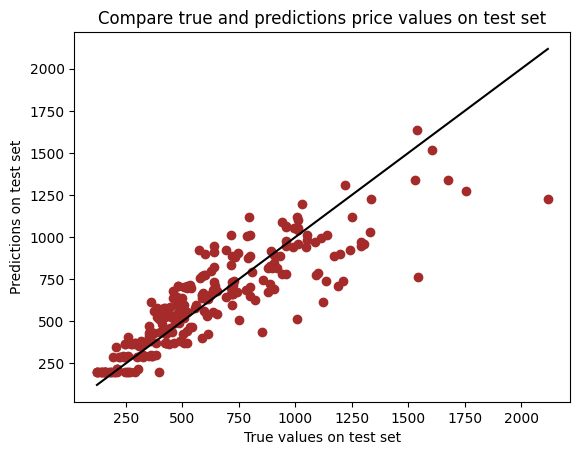

In [56]:
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'black')

plt.scatter(y_test, y_pred, c = "brown")
plt.title('Compare true and predictions price values on test set')
plt.xlabel('True values on test set')
plt.ylabel('Predictions on test set')
plt.show()


---

## <a id="class8">**11. Model Saving**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/1004/1004755.png" alt="drawing" width="64" align="center"/></a>


---

In [57]:
# Simpan scaler
with open('model.pkl', 'wb') as file_1:
    pickle.dump(best_randomforest, file_1)
